In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn

import torch.optim as optim

from copy import deepcopy

from torch.distributions import Categorical

import itertools

import sys
sys.path.insert(0, './../libraries/')

import partial_marginalization_lib as pm_lib
import bernoulli_experiments_lib as bern_lib

In [2]:
import sys
sys.path.insert(0, '../../../celeste_net/')
import celeste_net 

from datasets import Synthetic

In [3]:
side_len = 31

In [4]:
galaxy_data = Synthetic(side_len, min_galaxies=1, max_galaxies=1, num_bands=5)

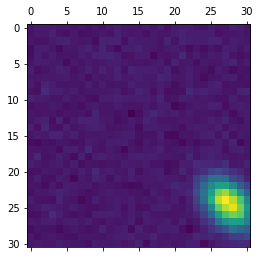

In [9]:
data1 = galaxy_data.__getitem__(1)

plt.matshow(data1['image'][0, :, :])

In [10]:
galaxy_vae = celeste_net.CelesteRNN(side_len, max_detections=4)

state_dict = torch.load("./galaxy_vae.dat", map_location='cpu')
galaxy_vae.load_state_dict(state_dict, strict=False)

galaxy_vae.eval()

CelesteRNN(
  (attn_enc): PixelAttention(
    (attn): Sequential(
      (0): Conv2d(10, 7, kernel_size=(3, 3), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(7, 7, kernel_size=(3, 3), stride=(1, 1))
      (3): ReLU()
      (4): Conv2d(7, 7, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Conv2d(7, 1, kernel_size=(3, 3), stride=(1, 1))
      (7): Flatten()
      (8): Softmax()
    )
    (detect_none): Sequential(
      (0): Conv2d(10, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (8): Conv2d(16, 16, kernel_size=(3, 3), stride

In [15]:
image = torch.Tensor([data1['image']])
var =  torch.Tensor([data1['image']])

In [16]:
pixel_probs = galaxy_vae.attn_enc(image, var)

In [17]:
log_q_a, pixel_2d, keep_on = galaxy_vae.pixel_sample(pixel_probs)

In [23]:
z_mean, z_var = galaxy_vae.enc(image, pixel_2d)

In [29]:
torch.save(galaxy_vae.enc.state_dict(), "../galaxy_results/encoder_og.dat")

In [30]:
torch.save(galaxy_vae.dec.state_dict(), "../galaxy_results/decoder_og.dat")

In [31]:
torch.save(galaxy_vae.attn_enc.state_dict(), "../galaxy_results/pixel_attn_og.dat")

In [24]:
recon_mean, recon_var = galaxy_vae.dec(pixel_2d, keep_on, z_mean)

In [ ]:
galaxy_vae.enc

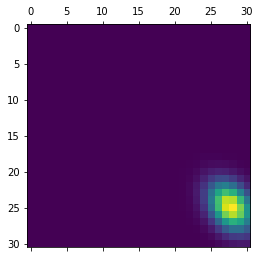

In [28]:
plt.matshow(recon_mean[0, 0, :, :].detach())